In [2]:
import os
import sys
import scipy
import numpy as np
import scipy.io as sio
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
import scipy.misc as sm
import matplotlib
import matplotlib.pyplot as plt
from glob import glob

In [3]:
def scale_range(input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

# Formal plots for manuscript

## Figure 4, CNN prediction vs HAADF

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(64, 3, 'f')

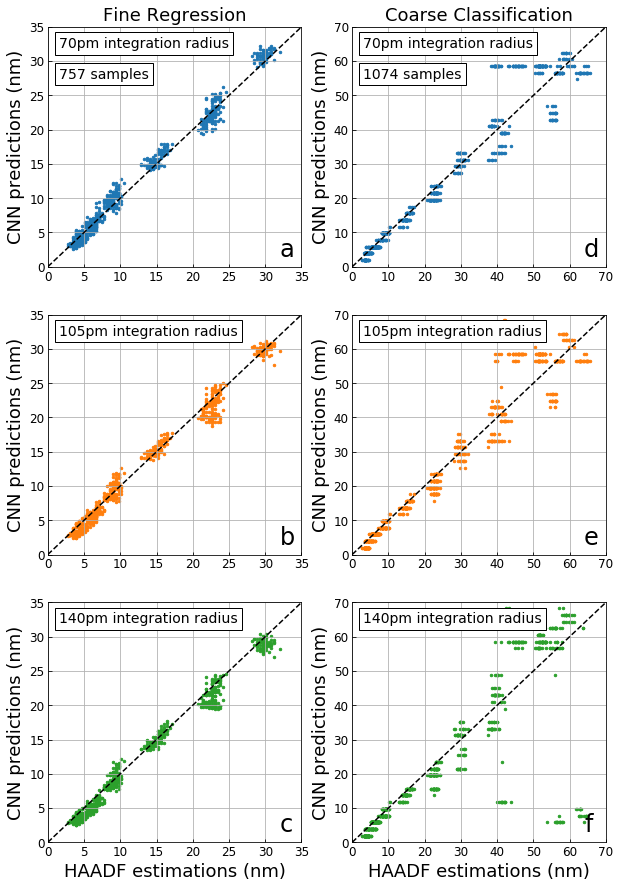

In [4]:
model_path = '/srv/home/chenyu/CNN/Regression/Coarse_CNN/PartiallyTraining/35nm/attempt_5/'

fig = plt.figure(figsize=(10,15))

pred = np.load(model_path + 'prediction_r4_coarse_regression.npy')
truth = np.load(model_path + 'truth.npy')
fig.add_subplot(321)
plt.grid('on')
plt.plot(np.linspace(0, 100, 1000),np.linspace(0, 100, 1000),linestyle='dashed',color='black')
plt.scatter(truth,pred,color='#1f77b4',s=6)
plt.xlim([0,35])
plt.ylim([0,35])
plt.tick_params(direction='in',labelsize=12)
plt.ylabel('CNN predictions (nm)',fontsize=18)
plt.text(1.5,32, '70pm integration radius', fontsize=14,bbox=dict(facecolor='white', alpha=1))
plt.text(1.5,27.5, '757 samples', fontsize=14,bbox=dict(facecolor='white', alpha=1))
plt.text(32,1.5, 'a', fontsize=24)
plt.title('Fine Regression',fontsize=18)

pred = np.load(model_path + 'prediction_r6_coarse_regression.npy')
truth = np.load(model_path + 'truth.npy')
fig.add_subplot(323)
plt.grid('on')
plt.plot(np.linspace(0, 100, 1000),np.linspace(0, 100, 1000),linestyle='dashed',color='black')
plt.scatter(truth,pred,color='#ff7f0e',s=6)
plt.xlim([0,35])
plt.ylim([0,35])
plt.tick_params(direction='in',labelsize=12)
plt.ylabel('CNN predictions (nm)',fontsize=18)
plt.text(32,1.5, 'b', fontsize=24)
plt.text(1.5,32, '105pm integration radius', fontsize=14,bbox=dict(facecolor='white', alpha=1))

pred = np.load(model_path + 'prediction_r8_coarse_regression.npy')
truth = np.load(model_path + 'truth.npy')
fig.add_subplot(325)
plt.plot(np.linspace(0, 100, 1000),np.linspace(0, 100, 1000),linestyle='dashed',color='black')
plt.scatter(truth,pred,color='#2ca02c',s=6)
plt.xlim([0,35])
plt.ylim([0,35])
plt.grid('on')
plt.tick_params(direction='in',labelsize=12)
plt.ylabel('CNN predictions (nm)',fontsize=18)
plt.xlabel('HAADF estimations (nm)', fontsize=18)
plt.text(1.5,32, '140pm integration radius', fontsize=14,bbox=dict(facecolor='white', alpha=1))
plt.text(32,1.5, 'c', fontsize=24)

# Coarse classification part

model_path = '/srv/home/chenyu/CNN/Regression/Luis_scheme/Coarse_classification/'

pred = np.load(model_path + 'prediction_r4_coarse_classification.npy')
truth = np.load(model_path + 'truth.npy')
fig.add_subplot(322)
plt.grid('on')
plt.plot(np.linspace(0, 100, 1000),np.linspace(0, 100, 1000),linestyle='dashed',color='black')
plt.scatter(truth,pred,color='#1f77b4',s=6)
plt.xlim([0,70])
plt.ylim([0,70])
plt.tick_params(direction='in',labelsize=12)
plt.ylabel('CNN predictions (nm)',fontsize=18)
plt.text(3,64, '70pm integration radius', fontsize=14,bbox=dict(facecolor='white', alpha=1))
plt.text(3,55,'1074 samples', fontsize=14,bbox=dict(facecolor='white', alpha=1))
plt.title('Coarse Classification',fontsize=18)
plt.text(64,3, 'd', fontsize=24)

pred = np.load(model_path + 'prediction_r6_coarse_classification.npy')
truth = np.load(model_path + 'truth.npy')
fig.add_subplot(324)
plt.grid('on')
plt.plot(np.linspace(0, 100, 1000),np.linspace(0, 100, 1000),linestyle='dashed',color='black')
plt.scatter(truth,pred,color='#ff7f0e',s=6)
plt.xlim([0,70])
plt.ylim([0,70])
plt.tick_params(direction='in',labelsize=12)
plt.ylabel('CNN predictions (nm)',fontsize=18)
plt.text(3,64, '105pm integration radius', fontsize=14,bbox=dict(facecolor='white', alpha=1))
plt.text(64,3, 'e', fontsize=24)

pred = np.load(model_path + 'prediction_r8_coarse_classification.npy')
truth = np.load(model_path + 'truth.npy')
fig.add_subplot(326)
plt.plot(np.linspace(0, 100, 1000),np.linspace(0, 100, 1000),linestyle='dashed',color='black')
plt.scatter(truth,pred,color='#2ca02c',s=6)
plt.xlim([0,70])
plt.ylim([0,70])
plt.grid('on')
plt.tick_params(direction='in',labelsize=12)
plt.ylabel('CNN predictions (nm)',fontsize=18)
plt.xlabel('HAADF estimations (nm)', fontsize=18)
plt.text(3,64, '140pm integration radius', fontsize=14,bbox=dict(facecolor='white', alpha=1))
plt.text(64,3, 'f', fontsize=24)


In [42]:
model_path = '/srv/home/chenyu/CNN/Regression/Coarse_CNN/PartiallyTraining/35nm/attempt_5/'
pred = np.load(model_path + 'prediction_r8_coarse_regression.npy')
truth = np.load(model_path + 'truth.npy')
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,truth)
np.sqrt(mean_squared_error(pred,truth))

1.137919439518128

In [43]:
diff = np.abs(pred-truth)
diff = diff[diff<2]
diff.shape[0]/pred.shape[0]

0.9313077939233818

In [48]:
model_path = '/srv/home/chenyu/CNN/Regression/Luis_scheme/Coarse_classification/'
pred = np.load(model_path + 'prediction_r8_coarse_classification.npy')
truth = np.load(model_path + 'truth.npy')
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,truth)
np.sqrt(mean_squared_error(pred,truth))

13.098858938464675

In [49]:
diff = np.abs(pred-truth)
diff = diff[diff<2]
diff.shape[0]/pred.shape[0]

0.5473098330241187